In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt

import sys
sys.path.append("..")  

#for development purposes
%reload_ext autoreload
%autoreload 2
pd.options.display.float_format = '{:.4g}'.format

import enlopy as el

## Generate energy loads using monthly and daily profiles for a working and a non-working day

Create random monthly and daily loads

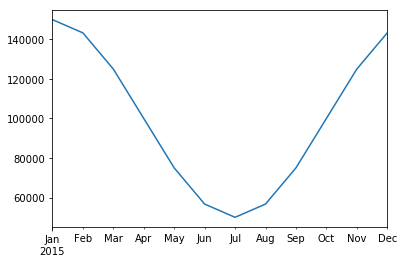

In [2]:
ML  = (np.cos(2 * np.pi/12 * np.linspace(0,11,12)) * 50 + 100 ) * 1000  # monthly load
ML = el.make_timeseries(ML) #convenience wrapper around pd.DataFrame with pd.DateTimeindex
ML.plot()

Create normalized random daily load for a working and non-working day

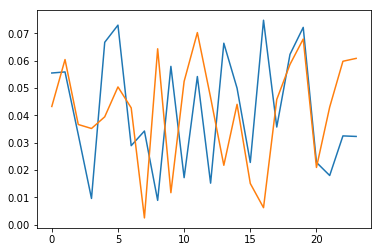

In [3]:
DWL =  np.random.rand(24) * 10 #daily load working
DWL = DWL / DWL.sum() # normalized

DNWL = np.random.rand(24) * 5 #daily load non working
DNWL = DNWL / DNWL.sum() #normalized daily load non working

plt.plot(DNWL)
plt.plot(DWL)

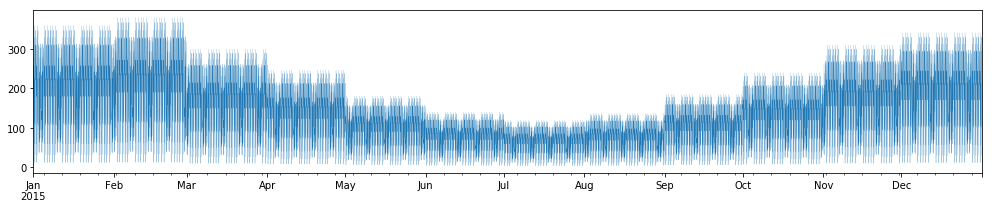

In [4]:
#Define the weighting factor of energy during working and non-working days.
Weight = .55 # i.e energy will be split 55% in working day 45% non working day

Load1 =  el.gen_load_from_daily_monthly(ML, DWL, DNWL, Weight)
Load1.name='House1'
Load1.plot(figsize=(17,3), linewidth =.2, grid = False);

Check if the total sum of energy is the same

In [5]:
print 'error = {:.2f}'.format(Load1.sum() - ML.sum())

error = -0.00


## Reshape (days - hours) and plot heatmap 

In [6]:
el.reshape_timeseries(Load1, x='month', y='hour')

month,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
0,6949,6631,5791,4606,3502,2612,2298,2647,3455,4633,5804,6587
1,8893,8499,7411,5939,4437,3367,2971,3354,4454,5929,7406,8515
2,5360,5122,4466,3581,2672,2030,1792,2020,2686,3573,4462,5136
3,4315,4138,3596,2932,2101,1662,1476,1588,2199,2877,3568,4230
4,6946,6620,5788,4572,3534,2592,2276,2671,3429,4631,5819,6522
5,8412,8023,7010,5560,4256,3152,2771,3218,4170,5608,7035,7942
6,5891,5636,4909,3957,2915,2244,1984,2204,2968,3927,4894,5686
7,1565,1476,1304,975,853.1,552.8,475.1,644.9,731.2,1043,1339,1362
8,7569,7264,6307,5165,3661,2928,2604,2768,3874,5046,6246,7463


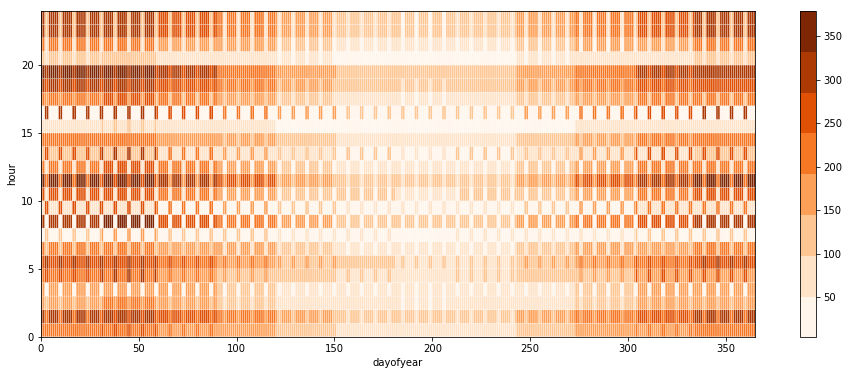

In [7]:
el.plot_heatmap(Load1)

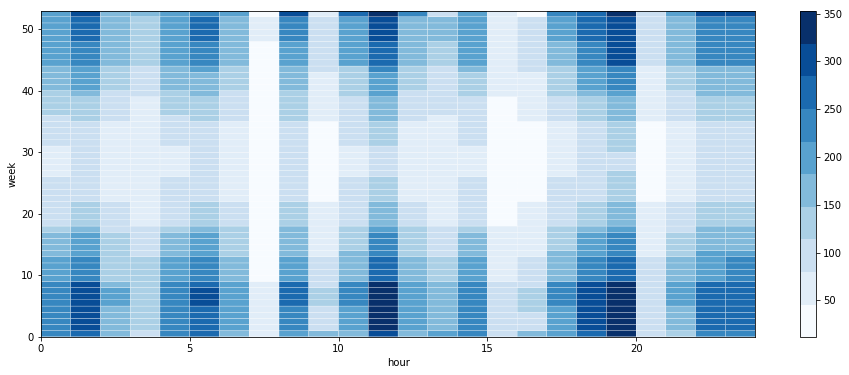

In [8]:
el.plot_heatmap(Load1, x='hour', y='week',bins=10, aggfunc='mean', palette='Blues')

### Plot percentiles

In [9]:
el.make_timeseries(length=200,freq='w',startdate='01.01.2015')

2015-01-04   nan
2015-01-11   nan
2015-01-18   nan
2015-01-25   nan
2015-02-01   nan
2015-02-08   nan
2015-02-15   nan
2015-02-22   nan
2015-03-01   nan
2015-03-08   nan
2015-03-15   nan
2015-03-22   nan
2015-03-29   nan
2015-04-05   nan
2015-04-12   nan
2015-04-19   nan
2015-04-26   nan
2015-05-03   nan
2015-05-10   nan
2015-05-17   nan
2015-05-24   nan
2015-05-31   nan
2015-06-07   nan
2015-06-14   nan
2015-06-21   nan
2015-06-28   nan
2015-07-05   nan
2015-07-12   nan
2015-07-19   nan
2015-07-26   nan
              ..
2018-04-08   nan
2018-04-15   nan
2018-04-22   nan
2018-04-29   nan
2018-05-06   nan
2018-05-13   nan
2018-05-20   nan
2018-05-27   nan
2018-06-03   nan
2018-06-10   nan
2018-06-17   nan
2018-06-24   nan
2018-07-01   nan
2018-07-08   nan
2018-07-15   nan
2018-07-22   nan
2018-07-29   nan
2018-08-05   nan
2018-08-12   nan
2018-08-19   nan
2018-08-26   nan
2018-09-02   nan
2018-09-09   nan
2018-09-16   nan
2018-09-23   nan
2018-09-30   nan
2018-10-07   nan
2018-10-14   n

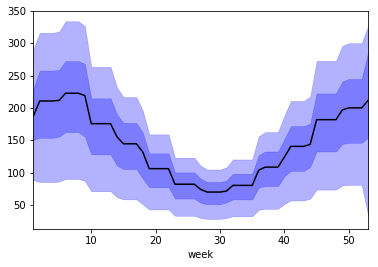

In [10]:
el.plot_percentiles(Load1, x='week', zz='hour')

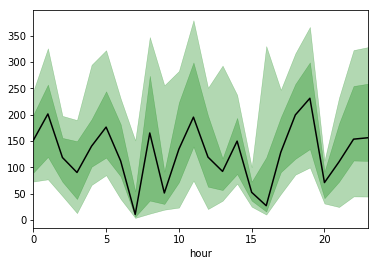

In [11]:
el.plot_percentiles(Load1, x='hour', zz='dayofyear', perc_list=[[1,99], [25,75], 50],color='green')

### 3d plots

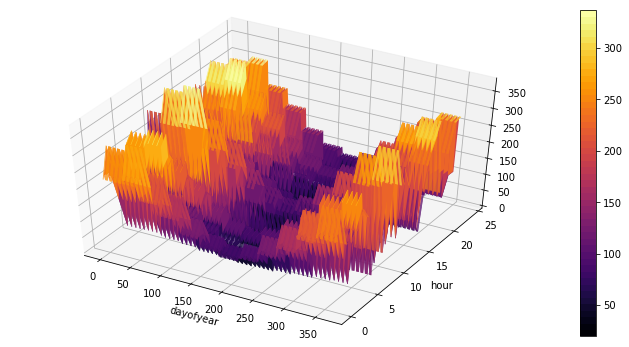

In [12]:
el.plot_3d(Load1, bins=50, palette='inferno')

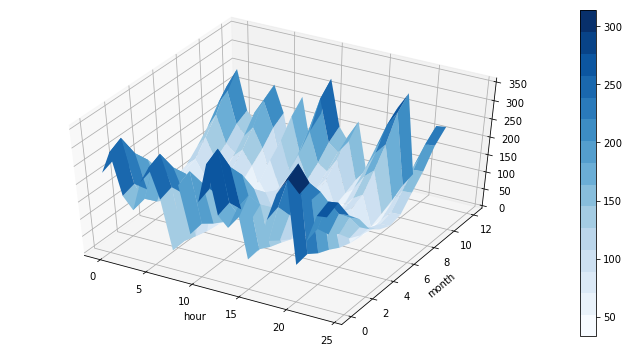

In [13]:
el.plot_3d(Load1, x='hour', y='month', aggfunc='mean', palette='Blues')

### Boxplot

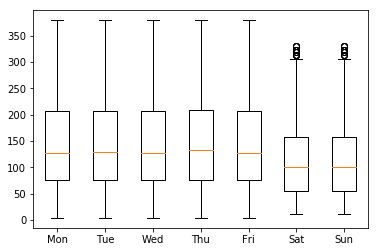

In [14]:
el.plot_boxplot(Load1, by='day')

### Rugplot

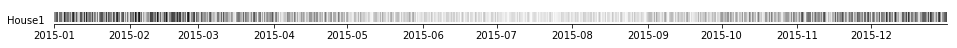

In [15]:
el.plot_rug(Load1, on_off=False, cmap='Greys')

It can accept a dataframe of timeseries and optionally normalize by the maximum value of the whole DataFrame


In [16]:
# Generate dummy dataframe of load profiles
df_many = pd.concat([Load1, 3 * Load1, Load1['Jun 2015':'Nov 2015']], axis=1)
df_many.columns = ['House1', 'House2', 'House3']

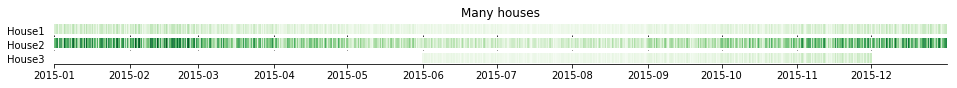

In [17]:
el.plot_rug(df_many, cmap='Greens', fig_title='Many houses', normalized=True)

## Archetypes

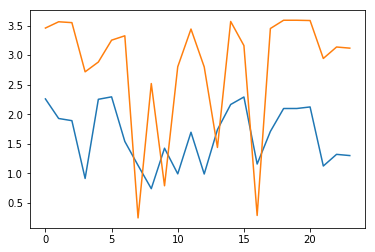

In [18]:
plt.plot(el.get_load_archetypes(Load1,2));

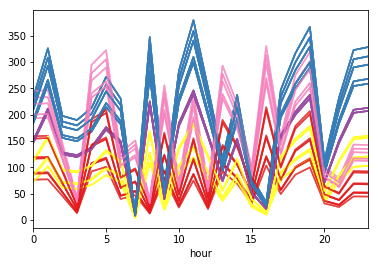

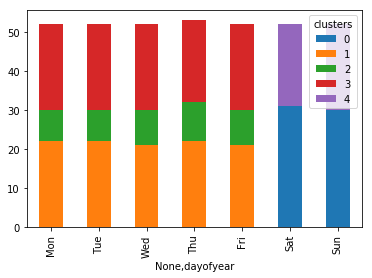

In [19]:
el.get_load_archetypes(Load1, 5, plot_diagnostics=True);

## Get and plot Load Duration Curve of load

In [20]:
el.get_LDC(Load1)

(array([  1.14155251e-04,   2.28310502e-04,   3.42465753e-04, ...,
          9.99771689e-01,   9.99885845e-01,   1.00000000e+00]),
 array([ 379.48684071,  379.48684071,  379.48684071, ...,    4.15653436,
           4.15653436,    4.15653436]))

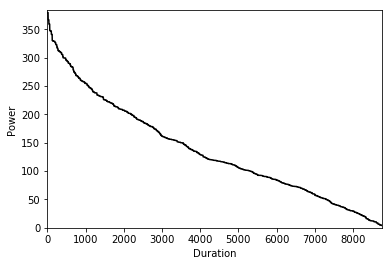

In [21]:
el.plot_LDC(Load1, x_norm=False)

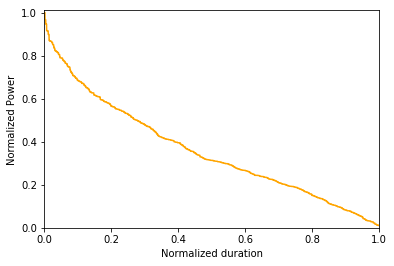

In [22]:
el.plot_LDC(Load1, y_norm=True, color='Orange')

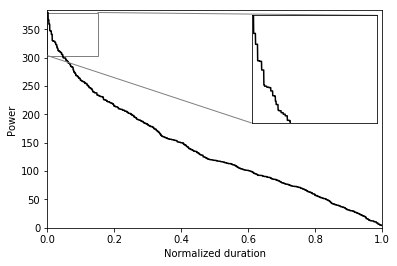

In [23]:
el.plot_LDC(Load1, zoom_peak=True)

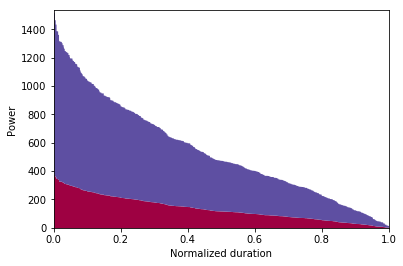

In [24]:
#Works also for 2-D
el.plot_LDC(df_many[['House1', 'House2']])

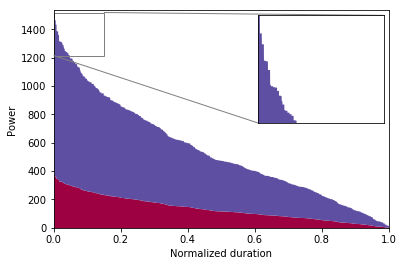

In [25]:
el.plot_LDC(df_many[['House1', 'House2']],zoom_peak=True)

# Add noise to a load

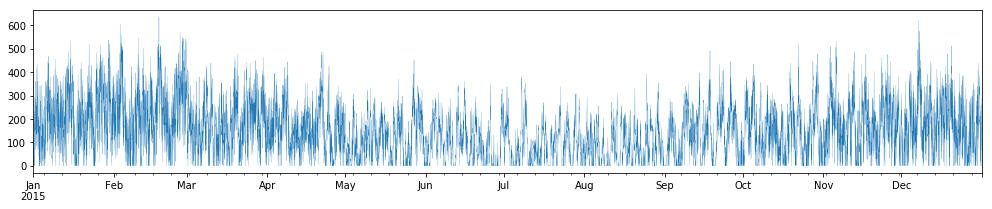

In [26]:
Load1_noise = el.add_noise(Load1, 3, 100) # Gauss Markov noise

fig = plt.figure(figsize=(14,3))

#plt.plot(Load1_noise,linewidth =.3)
Load1_noise.plot(figsize=(17,3), linewidth =.2, grid = False)
Load1_noise.name='Noisy'

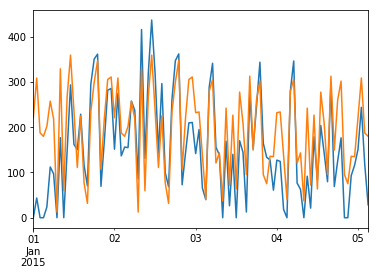

In [27]:
Load1_noise.iloc[0:100].plot()
Load1.iloc[0:100].plot()

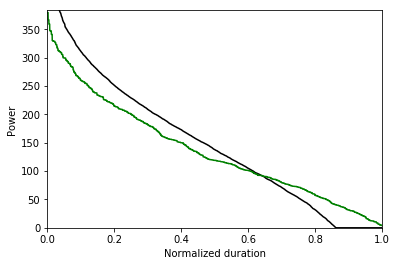

In [28]:
el.plot_LDC(Load1_noise)
el.plot_LDC(Load1, color='g')

## Gather statistics

In [29]:
el.get_load_stats(Load1)

,2015
Average,137
Biggest duration of consecutive zero load,0
Load Factor (peakiness),0.361
Load ratio (max/min),91.3
Max,379.5
Min (2%),4.157
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-218.297002251, 217.56300736)"
Sum,1.2e+06
Total Zero load duration,0


We can also check the statistics per defined time period. Example for month ('m'):

In [30]:
el.get_load_stats(Load1, per='m') 

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
Average,201.6,213.2,168,138.9,100.8,78.75,67.2,76.21,104.2,134.4,173.6,192.6
Biggest duration of consecutive zero load,0,0,0,0,0,0,0,0,0,0,0,0
Load Factor (peakiness),0.5614,0.5619,0.5614,0.564,0.558,0.564,0.5649,0.558,0.564,0.5614,0.5604,0.5649
Load ratio (max/min),28.62,28.62,28.62,28.62,28.62,28.62,28.62,28.62,28.62,28.62,28.62,28.62
Max,359.1,379.5,299.3,246.3,180.7,139.6,119,136.6,184.7,239.4,309.8,341
Min (2%),12.55,13.26,10.46,8.604,6.312,4.879,4.157,4.772,6.453,8.365,10.82,11.91
Periodicity,"(124.0, 23.0)","(112.0, 22.0)","(124.0, 23.0)","(120.0, 22.0)","(124.0, 23.0)","(120.0, 22.0)","(124.0, 23.0)","(124.0, 23.0)","(120.0, 22.0)","(124.0, 23.0)","(120.0, 22.0)","(124.0, 23.0)"
Ramps (98%),"(-269.118576901, 316.292108981)","(-284.395113018, 334.246454169)","(-224.265480751, 263.576757484)","(-184.55477779, 216.905204248)","(-135.39766408, 159.131388163)","(-104.640214812, 122.982495702)","(-89.154154194, 104.781898667)","(-102.358340969, 120.300634425)","(-138.416083343, 162.678903186)","(-179.412384601, 210.861405987)","(-232.172276547, 272.86952778)","(-255.518070773, 300.307583438)"
Sum,1.5e+05,1.433e+05,1.25e+05,1e+05,7.5e+04,5.67e+04,5e+04,5.67e+04,7.5e+04,1e+05,1.25e+05,1.433e+05
Total Zero load duration,0,0,0,0,0,0,0,0,0,0,0,0


## Load Shifting

In [31]:
Load1_DR = el.gen_demand_response(Load1, 0.15, 0.30)

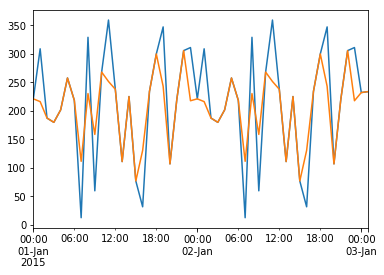

In [32]:
Load1[0:50].plot()
Load1_DR[0:50].plot()

In [33]:
el.get_load_stats(Load1)

,2015
Average,137
Biggest duration of consecutive zero load,0
Load Factor (peakiness),0.361
Load ratio (max/min),91.3
Max,379.5
Min (2%),4.157
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-218.297002251, 217.56300736)"
Sum,1.2e+06
Total Zero load duration,0


In [34]:
el.get_load_stats(Load1_DR) #it is less peaky as expected after the peak shaving

,2015
Average,136.1
Biggest duration of consecutive zero load,0
Load Factor (peakiness),0.4215
Load ratio (max/min),12.67
Max,322.8
Min (2%),25.49
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-140.559128288, 115.484298288)"
Sum,1.192e+06
Total Zero load duration,0


## Sample new loads from load duration curve

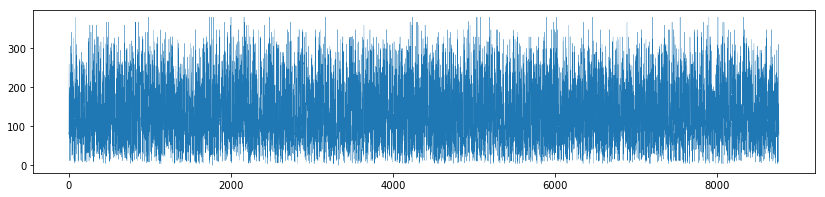

In [35]:
Load1a = el.gen_load_from_LDC(el.get_LDC(Load1))
fig = plt.figure(figsize=(14,3))
plt.plot(Load1a, linewidth =.3)

Check whether they have the same distribution

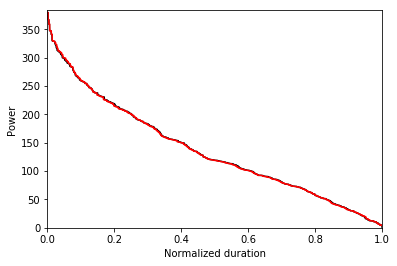

In [36]:
el.plot_LDC(Load1a)
el.plot_LDC(Load1,color='red')